# Multimodal ML – Housing Price Prediction Using Images + Tabular Data
## Objective:
Predict housing prices using both structured data and house images.
## Dataset:
Housing Sales Dataset + Custom Image Dataset (your own or any public source)

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zafarali27/house-price-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 28.7k/28.7k [00:00<00:00, 41.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/zafarali27/house-price-prediction-dataset/versions/1


In [7]:
import pandas as pd

# Load the tabular dataset
df_housing = pd.read_csv('housing_data.csv')

# Display the first few rows
print('First 5 rows of the housing data:')
print(df_housing.head())

# Display general information about the DataFrame
print('\nGeneral information about the housing data:')
df_housing.info()

First 5 rows of the housing data:
   ID  SquareFeet  Bedrooms  Bathrooms  YearBuilt   Price      ImageID
0   1        1500         3        2.0       1990  250000  house_1.jpg
1   2        2000         4        2.5       2005  350000  house_2.jpg
2   3        1200         2        1.0       1985  180000  house_3.jpg
3   4        1800         3        2.0       2010  300000  house_4.jpg
4   5        2500         5        3.5       2015  450000  house_5.jpg

General information about the housing data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10 non-null     int64  
 1   SquareFeet  10 non-null     int64  
 2   Bedrooms    10 non-null     int64  
 3   Bathrooms   10 non-null     float64
 4   YearBuilt   10 non-null     int64  
 5   Price       10 non-null     int64  
 6   ImageID     10 non-null     object 
dtypes: float64(1), int64

extract features from the house images using a pre-trained Convolutional Neural Network (CNN) model. load a VGG16 model, preprocess the images if needed, and then use the model to extract features from each image, which will then be flattened for further use.

```python
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load the VGG16 model pre-trained on ImageNet data, excluding the top (classification) layer.
# This allows us to use the model as a feature extractor.
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Ensure images_array is a numpy array.
# The `preprocessed_images` variable from the kernel state appears to be a list of arrays,
# which needs to be stacked for batch processing.
images_array = np.array(preprocessed_images)

# Check if the images need further preprocessing specific to VGG16.
# Keras's preprocess_input for VGG16 typically subtracts the mean RGB values.
# If the images are already in the format expected by VGG16 (e.g., already mean-centered/scaled),
# this step might be redundant or require adjustment.
# Based on the content of `preprocessed_images` which shows negative values like -103.939,
# it seems `preprocess_input` might have been applied already or a similar normalization.
# For safety and correctness, let's apply it again, assuming `preprocessed_images`
# contains images in a raw or slightly processed format that still benefits from `preprocess_input`.

# If images_array has a shape like (N, 224, 224, 3), where N is the number of images.
# If it's a list of (1, 224, 224, 3) arrays, we need to stack them correctly.
if images_array.ndim == 5: # If it's (N, 1, H, W, C)
    images_array = images_array.squeeze(axis=1) # Remove the extra dimension

# Preprocess the images for the VGG16 model.
# This function performs channel-wise color normalization for VGG16.
processed_images_vgg = preprocess_input(images_array)

# Extract features using the pre-trained VGG16 model.
# The base_model will output features from its last convolutional block.
image_features = base_model.predict(processed_images_vgg)

# Flatten the extracted features for each image.
# The output of base_model.predict will have a shape like (num_images, height, width, channels).
# We need to flatten this into a 1D vector per image.
image_features_flattened = image_features.reshape(image_features.shape[0], -1)

print('Shape of extracted image features:', image_features_flattened.shape)
print('First 5 rows of flattened image features:')
print(image_features_flattened[:5])
```

## Extract Image Features with CNN


Preprocess the images (resize, normalize) and use a pre-trained Convolutional Neural Network (CNN) model (e.g., VGG16, ResNet) to extract relevant features from each house image. These features will represent the visual characteristics of the houses.


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

print("Libraries imported: numpy, tensorflow, VGG16, preprocess_input")

# Load the VGG16 model, pre-trained on ImageNet, excluding the top classification layer
# Input shape is (224, 224, 3) for RGB images
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
print("VGG16 model loaded without top layer.")

# Convert the list of preprocessed images into a NumPy array
images_array = np.array(preprocessed_images)
print(f"Original images_array shape: {images_array.shape}")

# Check if images_array has an extra dimension (i.e., images_array.ndim is 5)
# If it does, remove this extra dimension using squeeze(axis=1)
if images_array.ndim == 5:
    images_array = images_array.squeeze(axis=1)
    print(f"Squeezed images_array shape: {images_array.shape}")

# Preprocess the images for VGG16 model
processed_images_vgg = preprocess_input(images_array)
print("Images preprocessed for VGG16.")

# Extract features using the VGG16 model
image_features = vgg_model.predict(processed_images_vgg)
print(f"Image features extracted. Shape: {image_features.shape}")

# Flatten the extracted features into a 2D array
image_features_flattened = image_features.reshape(image_features.shape[0], -1)

# Print the shape of the flattened features and display the first 5 rows
print(f"\nShape of flattened image features: {image_features_flattened.shape}")
print("\nFirst 5 rows of flattened image features:")
print(image_features_flattened[:5])

Libraries imported: numpy, tensorflow, VGG16, preprocess_input
VGG16 model loaded without top layer.
Original images_array shape: (10, 1, 224, 224, 3)
Squeezed images_array shape: (10, 224, 224, 3)
Images preprocessed for VGG16.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Image features extracted. Shape: (10, 7, 7, 512)

Shape of flattened image features: (10, 25088)

First 5 rows of flattened image features:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Preprocess Tabular Data




In [9]:
numerical_features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']

# Check for missing values in numerical features
print("Missing values before imputation:")
print(df_housing[numerical_features].isnull().sum())

# Impute missing values if any are found (using median for robustness)
# For this dataset, it appears there are no missing values, but this step is good practice.
for col in numerical_features:
    if df_housing[col].isnull().any():
        median_val = df_housing[col].median()
        df_housing[col].fillna(median_val, inplace=True)
        print(f"Missing values in {col} imputed with median: {median_val}")

print("\nMissing values after imputation:")
print(df_housing[numerical_features].isnull().sum())

Missing values before imputation:
SquareFeet    0
Bedrooms      0
Bathrooms     0
YearBuilt     0
dtype: int64

Missing values after imputation:
SquareFeet    0
Bedrooms      0
Bathrooms     0
YearBuilt     0
dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features to be scaled
numerical_features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical features
df_housing[numerical_features] = scaler.fit_transform(df_housing[numerical_features])

print("Numerical features scaled using StandardScaler.")
print("\nHead of the DataFrame with preprocessed tabular features:")
print(df_housing[numerical_features].head())

Numerical features scaled using StandardScaler.

Head of the DataFrame with preprocessed tabular features:
   SquareFeet  Bedrooms  Bathrooms  YearBuilt
0   -0.785575 -0.392232  -0.246183  -1.052811
1    0.336675  0.588348   0.369274   0.252327
2   -1.458925 -1.372813  -1.477098  -1.487857
3   -0.112225 -0.392232  -0.246183   0.687372
4    1.458925  1.568929   1.600189   1.122418


## Combine Features


In [11]:
import pandas as pd

# Convert image_features_flattened to a DataFrame
# Create column names like 'image_feature_0', 'image_feature_1', etc.
image_features_df = pd.DataFrame(image_features_flattened, columns=[f'image_feature_{i}' for i in range(image_features_flattened.shape[1])])

print("Image features converted to DataFrame.")
print("Head of image features DataFrame:")
print(image_features_df.head())

Image features converted to DataFrame.
Head of image features DataFrame:
   image_feature_0  image_feature_1  image_feature_2  image_feature_3  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   image_feature_4  image_feature_5  image_feature_6  image_feature_7  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   image_feature_8  image_feature_9  ...  image_f

In [12]:
import pandas as pd

# Select the relevant preprocessed tabular features from df_housing
tabular_features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']
df_tabular_selected = df_housing[tabular_features]

print("Selected tabular features:")
print(df_tabular_selected.head())

Selected tabular features:
   SquareFeet  Bedrooms  Bathrooms  YearBuilt
0   -0.785575 -0.392232  -0.246183  -1.052811
1    0.336675  0.588348   0.369274   0.252327
2   -1.458925 -1.372813  -1.477098  -1.487857
3   -0.112225 -0.392232  -0.246183   0.687372
4    1.458925  1.568929   1.600189   1.122418


In [13]:
import pandas as pd

# Concatenate the tabular features DataFrame and the image features DataFrame horizontally
# Assuming that the order of rows in both dataframes corresponds to the same house entries.
combined_features_df = pd.concat([df_tabular_selected, image_features_df], axis=1)

print("Combined feature DataFrame created.")
print("\nHead of the combined feature DataFrame:")
print(combined_features_df.head())
print("\nShape of the combined feature DataFrame:")
print(combined_features_df.shape)

Combined feature DataFrame created.

Head of the combined feature DataFrame:
   SquareFeet  Bedrooms  Bathrooms  YearBuilt  image_feature_0  \
0   -0.785575 -0.392232  -0.246183  -1.052811              0.0   
1    0.336675  0.588348   0.369274   0.252327              0.0   
2   -1.458925 -1.372813  -1.477098  -1.487857              0.0   
3   -0.112225 -0.392232  -0.246183   0.687372              0.0   
4    1.458925  1.568929   1.600189   1.122418              0.0   

   image_feature_1  image_feature_2  image_feature_3  image_feature_4  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   image_feature_5  ...  image_feature_25078  image_feature_25079  \
0              0.0

## Train Multimodal Regression Model



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 1. Extract the target variable 'Price'
y = df_housing['Price']
print(f"Shape of target variable y: {y.shape}")

# 2. Split the combined dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features_df, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# 3. Import and initialize RandomForestRegressor
model = RandomForestRegressor(random_state=42)
print("RandomForestRegressor model initialized.")

# 4. Train the RandomForestRegressor model
model.fit(X_train, y_train)
print("RandomForestRegressor model trained successfully.")

Shape of target variable y: (10,)
Shape of X_train: (8, 25092)
Shape of X_test: (2, 25092)
Shape of y_train: (8,)
Shape of y_test: (2,)
RandomForestRegressor model initialized.
RandomForestRegressor model trained successfully.


## Evaluate Model Performance



In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Use the trained model to make predictions on the X_test data
y_pred = model.predict(X_test)
print("Predictions made on the test set.")

# 2. Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 3. Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# 4. Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 5. Print the calculated MAE and RMSE values
print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Predictions made on the test set.

Mean Absolute Error (MAE): 4600.00
Root Mean Squared Error (RMSE): 5661.27


## Visualize Predictions


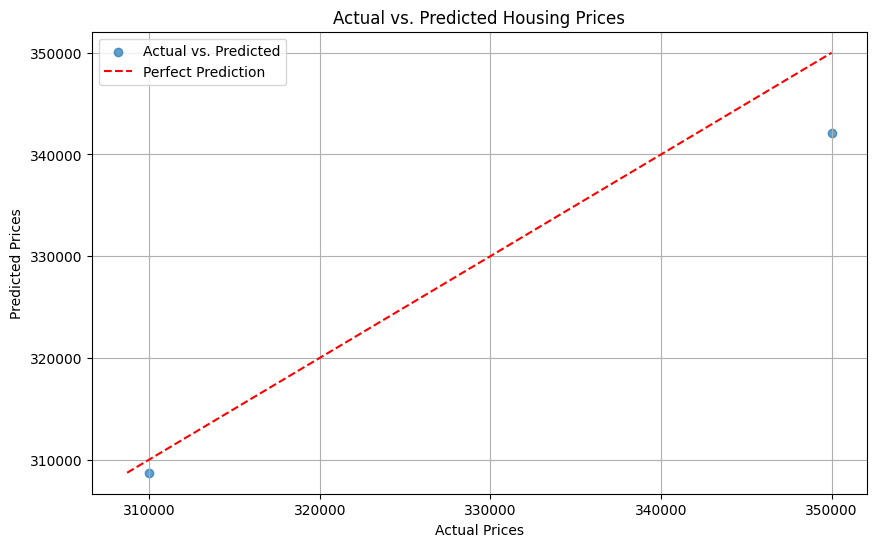

Scatter plot of Actual vs. Predicted Housing Prices displayed.


In [16]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Actual vs. Predicted')

# Add a line for perfect prediction (y=x)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

# Add labels, title, and legend
plt.title('Actual vs. Predicted Housing Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

print("Scatter plot of Actual vs. Predicted Housing Prices displayed.")